In [2]:
"""
This program is made by Johnathan Evans on june 27th, 2023. the intention is to try and curve fit methane sensor behavior to a laplacian curve using a partial differential analysis.
"""
#Install Libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.metrics import mean_squared_error


In [3]:
#Extract Data into parallel arrays
# Initialize empty parallel arrays
sensor_id = []
target_ppm = []
resistance = []
temperature = []
relative_humidity = []
low_interval = []
high_interval = []
ratio = []

# Open the CSV file
filename = "Output/BenSummaryJustMatrix.csv"
with open(filename, "r") as csv_file:
    # Create a CSV reader
    csv_reader = csv.DictReader(csv_file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Extract data from the row and append it to the respective parallel arrays
        sensor_id.append(row["SensorID"])
        target_ppm.append(row["Target PPM"])
        resistance.append(row["Resistance"])
        temperature.append(row["Temperature"])
        relative_humidity.append(row["RelativeHumidity"])
        low_interval.append(row["lowInterval"])
        high_interval.append(row["highInterval"])
        ratio.append(row["Ratio"])

# Close the file
csv_file.close()
print("Data extracted successfully!")


Data extracted successfully!


In [4]:
#extract the data into a 2d array
filename = "Output/BenSummaryJustMatrix.csv"
two_d_data = []

with open(filename, 'r') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # Read the header row

    for row in reader:
        two_d_data.append(row)

# Print the data
print(two_d_data[0])

['0', '0.0', '0.0', '7.812575228394485', '35.422920353982306', '45.221902654867264', '7.79232499225444', '7.8328254645345305', '0.27725981744813594']


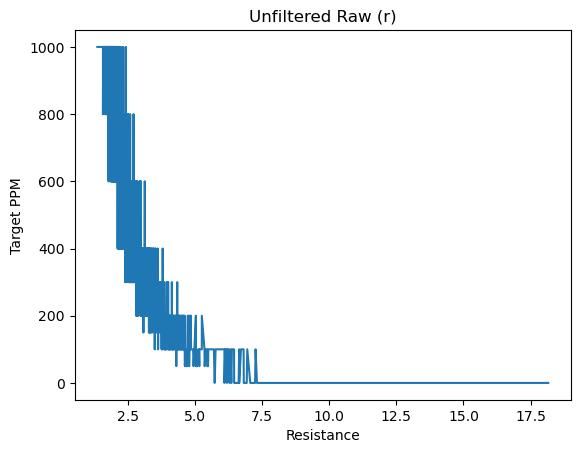

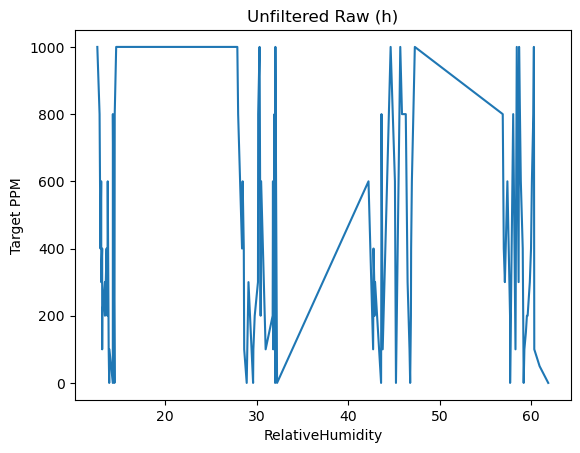

In [5]:
# Sort the data based on the second index of each row, this index represents the resistance
sorted_data_r = sorted(two_d_data, key=lambda x: float(x[3]))
sorted_data_h = sorted(two_d_data, key=lambda x: float(x[5]))

# Print the sorted data
#for row in sorted_data_h:
#    print(row[5])

# Extract the values for plotting
x = [float(row[3]) for row in sorted_data_r]
y = [float(row[2]) for row in sorted_data_r]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[3])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Unfiltered Raw (r)")
plt.show()

# Extract the values for plotting
x = [float(row[5]) for row in sorted_data_h]
y = [float(row[2]) for row in sorted_data_h]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[5])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Unfiltered Raw (h)")
plt.show()

128 Samples Taken
12.924905973451331 Average


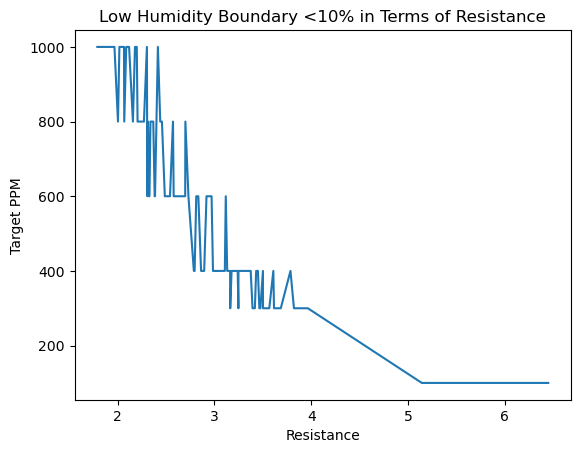

In [6]:
#attempt to delete all conditions but the boundary conditions
low_humidity = []
i = 0
ct = 0
for row in sorted_data_r:
    if float(row[5])<13.1:
        low_humidity.append(row)
        i+=1
        ct+=float(row[5])
        #print(row[5])
print(str(i)+" Samples Taken")
print(str(ct/i)+" Average")

# Extract the values for plotting
x = [float(row[3]) for row in low_humidity]
y = [float(row[2]) for row in low_humidity]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[3])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Low Humidity Boundary <10% in Terms of Resistance")
plt.show()

# Combine the columns
data = list(zip(y, x))

# Define the output filename
filename = "JohnathanDataStorage/low_humidity.csv"

# Write the data to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([headers[2], headers[3]])  # Write the header row
    writer.writerows(data)  # Write the data rows

96 Samples Taken
60.633067846607524 Average


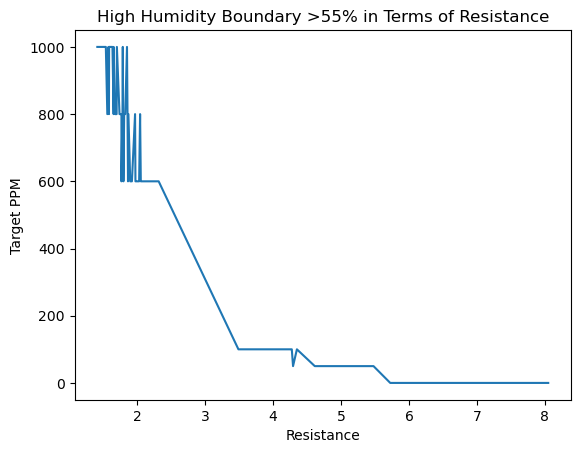

In [7]:
high_humidity = []
i = 0
ct = 0
for row in sorted_data_r:
    if float(row[5])>60.0:
        high_humidity.append(row)
        i+=1
        ct+=float(row[5])
        #print(row[5])
print(str(i)+" Samples Taken")
print(str(ct/i)+" Average")

# Extract the values for plotting
x = [float(row[3]) for row in high_humidity]
y = [float(row[2]) for row in high_humidity]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[3])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("High Humidity Boundary >55% in Terms of Resistance")
plt.show()

# Combine the columns
data = list(zip(y, x))

# Define the output filename
filename = "JohnathanDataStorage/high_humidity.csv"

# Write the data to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([headers[2], headers[3]])  # Write the header row
    writer.writerows(data)  # Write the data rows

118 Samples Taken
1.596059937879275 Average


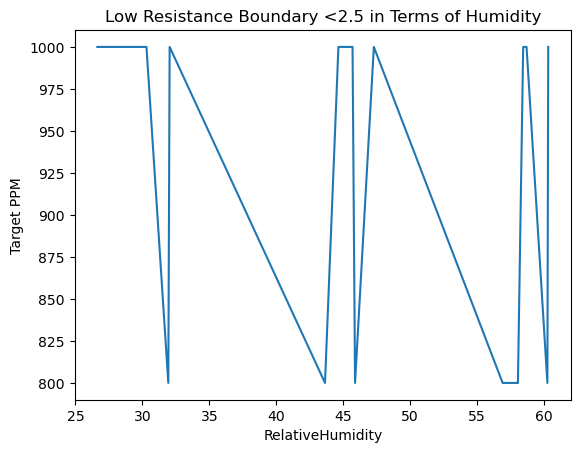

In [26]:
low_resistance = []
i = 0
ct = 0
for row in sorted_data_h:
    if float(row[3])<1.7:
        low_resistance.append(row)
        ct+=float(row[3])
        i+=1
        #print(row[3])
print(str(i)+" Samples Taken")
print(str(ct/i)+" Average")

# Extract Made by Johnathan Evans the values for plotting
x = [float(row[5]) for row in low_resistance]
y = [float(row[2]) for row in low_resistance]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[5])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("Low Resistance Boundary <2.5 in Terms of Humidity")
plt.show()


# Combine the columns
data = list(zip(y, x))

# Define the output filename
filename = "JohnathanDataStorage/low_resistance.csv"

# Write the data to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([headers[2], headers[5]])  # Write the header row
    writer.writerows(data)  # Write the data rows

182 Samples Taken
10.577307346594115 Average


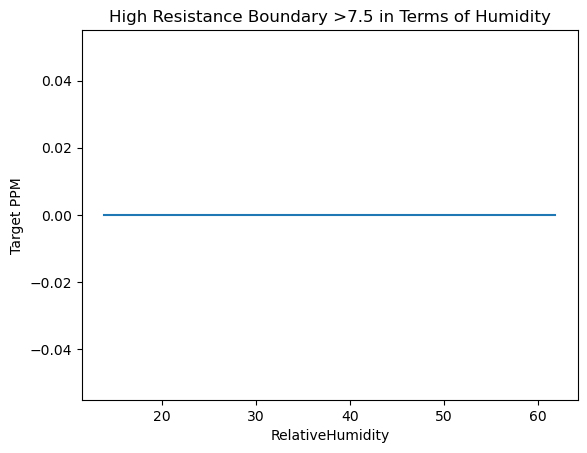

In [9]:
high_resistance = []
i = 0
ct = 0
for row in sorted_data_h:
    if float(row[3]) > 7.5:
        high_resistance.append(row)
        ct+=float(row[3])
        i+=1
        #print(row[3])
print(str(i)+" Samples Taken")
print(str(ct/i)+" Average")

# Extract the values for plotting
x = [float(row[5]) for row in high_resistance]
y = [float(row[2]) for row in high_resistance]

# Plot the data
plt.plot(x, y)
plt.xlabel(headers[5])  # Use the third header as the x-axis label
plt.ylabel(headers[2])  # Use the second header as the y-axis label
plt.title("High Resistance Boundary >7.5 in Terms of Humidity")
plt.show()


# Combine the columns
data = list(zip(y, x))

# Define the output filename
filename = "JohnathanDataStorage/high_resistance.csv"

# Write the data to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow([headers[2], headers[5]])  # Write the header row
    writer.writerows(data)  # Write the data rows

In [10]:
"""
Taking the four boundary plots and curve-fitting in excel leaves us with the following BCs
ppm(r,h)        = power             = exponential
ppm(r,12.92)    = 4642.9*r^(-2.113) = 2749.4*e^(-0.577r)
                  R = 0.90            R = 0.90
ppm(r,60.63)    = 8910.6*r^(-3.942) = 7415.2*e^(-1.182r)
                  R = 0.86            R = 0.96
ppm(1.628,h)    = -1.5786h+1030.5
ppm(7.5,h)      = 0

ChatGPT returns with the following:
ppm(r, h) = [A * r^λ + B * r^(-λ)] * [C * cos(λ * h) + D * sin(λ * h)]

Another attempt will compensate for some of the boundary...
ppm(r,h)        = power             = exponential
ppm(r,0)    = 4642.9*r^(-2.113) = 2749.4*e^(-0.577r)
                  R = 0.90            R = 0.90
ppm(r,47.71)    = 8910.6*r^(-3.942) = 7415.2*e^(-1.182r)
                  R = 0.86            R = 0.96
ppm(0,h)    = -1.5786h+1030.5
ppm(5.872,h)      = 0

ChatGPT states only the general solution (0) is valid.

Knowing how to work PDEs, i attempted:


with the intention to include a linear clause to account for the subtracted piece
ppm(r,h)        = power             = exponential
ppm(r,0)    = 4642.9*r^(-2.113) = 2749.4*e^(-0.577r)
                  R = 0.90            R = 0.90
ppm(r,47.71)    = 8910.6*r^(-3.942) = 7415.2*e^(-1.182r)
                  R = 0.86            R = 0.96
ppm(0,h)    = 0 (1) = 975 (2)
ppm(5.872,h)      = 0
with a result of (1) f(x, y) = A*sin(kx)De^(-ky)
(2) (Acos(kx))((975/g₀)cosh(ky) + Dsinh(k*y)) DOESNT WORK
where x = r-1.628 and y = h-12.92
Before continuing with this, i decided to approach it by hand...

After some simplification... i keep finding the homogeneous equation

I came up with another idea...
I state this is possible because the high and low r boundary conditions are near constant
the difference between boundary conditions in terms of humidity at max and min resistance may be able to be represented as a linear function in terms of measured humidity in place of the coefficients to regressed, exponential (or power) boundary equations in terms of resistance at max an min humidity
Stating:
ppm(r,h)        = power             = exponential
ppm(r,12.92)    = 4642.9*r^(-2.113) = 2749.4*e^(-0.577r)
                  R = 0.90            R = 0.90
ppm(r,60.63)    = 8910.6*r^(-3.942) = 7415.2*e^(-1.182r)
                  R = 0.86            R = 0.96
ppm(1.628,h)    ~ 957
ppm(7.5,h)      = 0

"""

'\nTaking the four boundary plots and curve-fitting in excel leaves us with the following BCs\nppm(r,h)        = power             = exponential\nppm(r,12.92)    = 4642.9*r^(-2.113) = 2749.4*e^(-0.577r)\n                  R = 0.90            R = 0.90\nppm(r,60.63)    = 8910.6*r^(-3.942) = 7415.2*e^(-1.182r)\n                  R = 0.86            R = 0.96\nppm(1.628,h)    = -1.5786h+1030.5\nppm(7.5,h)      = 0\n\nChatGPT returns with the following:\nppm(r, h) = [A * r^λ + B * r^(-λ)] * [C * cos(λ * h) + D * sin(λ * h)]\n\nAnother attempt will compensate for some of the boundary...\nppm(r,h)        = power             = exponential\nppm(r,0)    = 4642.9*r^(-2.113) = 2749.4*e^(-0.577r)\n                  R = 0.90            R = 0.90\nppm(r,47.71)    = 8910.6*r^(-3.942) = 7415.2*e^(-1.182r)\n                  R = 0.86            R = 0.96\nppm(0,h)    = -1.5786h+1030.5\nppm(5.872,h)      = 0\n\nChatGPT states only the general solution (0) is valid.\n\nKnowing how to work PDEs, i attempted:\

In [11]:
#Here I will play around with solutions from the comment block above
# (1) f(x, y) = A*sin(kx)De^(-ky)
# where x = r-1.628 and y = h-12.92

""" Did not converge well """


' Did not converge well '

In [12]:
#Here I will play around with solutions from the comment block above
# (2) (Acos(kx))((975/g₀)cosh(ky) + Dsinh(k*y))
# where x = r-1.628 and y = h-12.92

""" Did not converge well """

' Did not converge well '

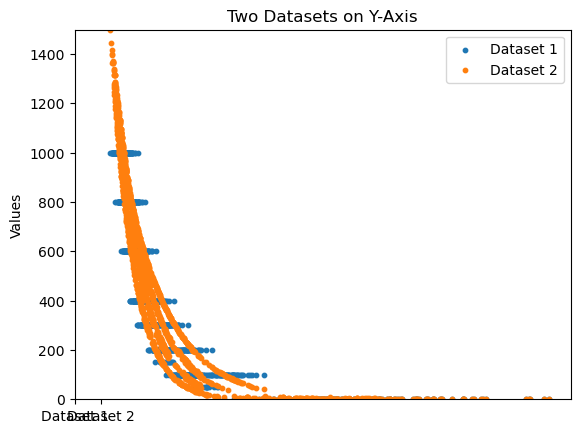

RMSE: 121.53775473945988
Standard Deviation: 121.53775473945988
R-squared: 0.8640993294318886


In [18]:
#Here I will play around with solutions from the comment block above
"""
first exponential:
ppm(r,h)        = A*e^(Br)
ppm(r,12.92)    = 2749.4*e^(-0.577r)
                R = 0.90
ppm(r,60.63)    = 7415.2*e^(-1.182r)
                R = 0.96
ppm(1.628,h)    ~ 957
ppm(7.5,h)      = 0
Here we make A and B linear functions of h (A(h), B(h))
where A(12.92) = 2749.4 and A(60.63) = 7415.2
A(h) = 97.71h + 1486.6648
where B(12.92) = -0.577 and B(60.63) = -1.182
B(h) = -0.012683h - 0.41317024
"""

def A(h):
    return 97.71*h + 1486.6648
def B(h):
    return -0.012683*h - 0.41317024
def ppm(r,h):
    result = A(h) * math.exp(B(h) * r)
    return result


y2 = []
for row in sorted_data_r:
    r = float(row[3])
    h = float(row[5])
    y2.append(ppm(r,h))

y1 = [float(row[2]) for row in sorted_data_r]
x1 = [float(row[3]) for row in sorted_data_r]
#print(y1)
# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the datasets as small points
ax.scatter(x1, y1, s=10, label='Dataset 1')
ax.scatter(x1, y2, s=10, label='Dataset 2')

# Set the y-axis limits
ax.set_ylim(0, max(max(y1), max(y2)) + 1)

# Set the tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Dataset 1', 'Dataset 2'])

# Set labels and title
ax.set_ylabel('Values')
ax.set_title('Two Datasets on Y-Axis')

# Add a legend
ax.legend()

# Display the plot
plt.show()



def calculate_standard_deviation(actual_values, calculated_values):
    residuals = actual_values - calculated_values
    squared_residuals = residuals ** 2
    mean_squared_residuals = squared_residuals.mean()
    standard_deviation = np.sqrt(mean_squared_residuals)
    return standard_deviation

def calculate_r_squared(actual_values, calculated_values):
    residuals = actual_values - calculated_values
    sum_of_squares_residuals = np.sum(residuals ** 2)
    mean_actual_values = np.mean(actual_values)
    sum_of_squares_total = np.sum((actual_values - mean_actual_values) ** 2)
    r_squared = 1 - (sum_of_squares_residuals / sum_of_squares_total)
    return r_squared

std_dev = calculate_standard_deviation(np.asarray(y1), np.asarray(y2))
r_squared = calculate_r_squared(np.asarray(y1), np.asarray(y2))
mse = mean_squared_error(np.asarray(y1), np.asarray(y2))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print("Standard Deviation:", std_dev)
print("R-squared:", r_squared)


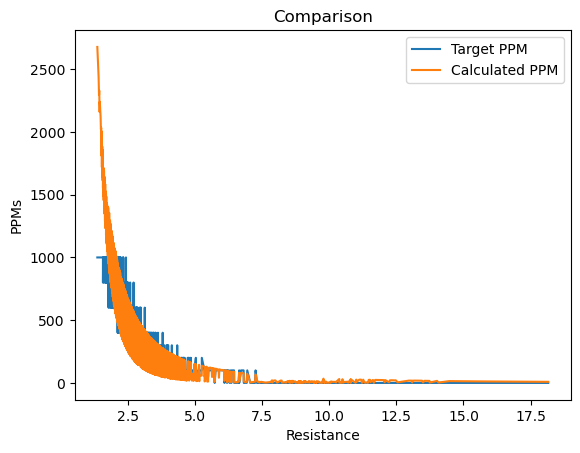

RMSE: 207.45757233753292
Standard Deviation: 207.45757233753292
R-squared: 0.604034120205174


In [16]:
#Here I will play around with solutions from the comment block above
"""
second, power:
ppm(r,h)        = A*r^(B)
ppm(r,12.92)    = 4642.9*r^(-2.113)
                  R = 0.90
ppm(r,60.63)    = 8910.6*r^(-3.942)
                R = 0.96
ppm(1.628,h)    ~ 957
ppm(7.5,h)      = 0
Here we make A and B linear functions of h (A(h), B(h))
where A(12.92) = 4642.9 and A(60.63) = 8910.6
A(h) = 89.470h + 3478.205
where B(12.92) = -2.113 and B(60.63) = -3.942
B(h) = -0.038304h - 1.617725
"""

def A(h):
    return 89.47*h + 3478.205
def B(h):
    return -0.038304*h - 1.617725
def ppm(r,h):
    result = A(h) * r ** B(h)
    return result


y2 = []
for row in sorted_data_r:
    r = float(row[3])
    h = float(row[5])
    y2.append(ppm(r,h))

y1 = [float(row[2]) for row in sorted_data_r]
x1 = [float(row[3]) for row in sorted_data_r]
#print(y1)
# Plot the datasets
plt.plot(x1, y1, label='Target PPM')
plt.plot(x1, y2, label='Calculated PPM')

# Set plot labels and title
plt.xlabel('Resistance')
plt.ylabel('PPMs')
plt.title('Comparison')

# Add legend
plt.legend()

# Display the plot
plt.show()



def calculate_standard_deviation(actual_values, calculated_values):
    residuals = actual_values - calculated_values
    squared_residuals = residuals ** 2
    mean_squared_residuals = squared_residuals.mean()
    standard_deviation = np.sqrt(mean_squared_residuals)
    return standard_deviation

def calculate_r_squared(actual_values, calculated_values):
    residuals = actual_values - calculated_values
    sum_of_squares_residuals = np.sum(residuals ** 2)
    mean_actual_values = np.mean(actual_values)
    sum_of_squares_total = np.sum((actual_values - mean_actual_values) ** 2)
    r_squared = 1 - (sum_of_squares_residuals / sum_of_squares_total)
    return r_squared

std_dev = calculate_standard_deviation(np.asarray(y1), np.asarray(y2))
r_squared = calculate_r_squared(np.asarray(y1), np.asarray(y2))
mse = mean_squared_error(np.asarray(y1), np.asarray(y2))

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print("Standard Deviation:", std_dev)
print("R-squared:", r_squared)
